# Problem Statement:

The objective of this analysis is to provide actionable insights and recommendations for stakeholders in the Indian restaurant industry by thoroughly examining various factors influencing customer preferences, service offerings, costs, and regional performance. The analysis aims to:

1. **Identify Popular Food Categories**: Determine the most popular food categories and understand regional preferences for vegetarian and non-vegetarian options.

2. **Analyze Rating Distributions**: Explore the distribution of restaurant ratings and identify how they vary with cost, location, and additional services.

3. **Evaluate Cost Impacts**: Understand the relationship between dining costs and customer ratings, and assess if higher costs correlate with better ratings.

4. **Examine Regional Performance**: Identify which cities and areas have the highest and lowest restaurant ratings, and how dining costs vary across regions.


By achieving these objectives, the analysis will deliver valuable insights that can help restaurant owners and stakeholders optimize their strategies, improve service offerings, and make data-driven decisions to enhance their market position and customer experience.

# 1. Data Collection:
* Understanding the trends and patterns in the restaurant industry is crucial for establishing new restaurant or even for increasing the profits for already existing restaurants. 
* The dataset is taken from Kaggle. The dataset contains information about restaurants in the top 49 most populous cities in India. Each entry in the dataset represents a restaurant outlet and includes the following attributes:

1. Restaurant Name: Name of the restaurant.
2. Category: Cuisines offered in the restaurant(Indian, Chinese and others).
3. Rating: Customer rating of the restaurant.
4. Cost for Two: Cost of a meal for two people in Rupees.
5. Veg: The restaurant offers only veg(True/False).
6. City: Indian city where the restaurant is located.
7. Area: Area of Restaurant.
8. Locality: Locality of Restaurant.
9. Address: Restaurant Adress.
10. Long Distance Delivery: Is Long Distance delivery enabled? (0=no, 1=yes)

Same Restaurants can be in multiple cities as different outlets/franchise hence, unique Restaurant Name is less than actual entries in dataset. 
* The data was gathered from Swiggy, a leading food delivery platform, and compiled into a dataset by Chinmay Shanbhag on Kaggle. It represents a wide variety of restaurant options available across India's top 49 cities by population, ensuring a wide-ranging view of the market.

* This dataset will be helpful in finding the customer preferences, finding customer niches, optimal locations for opening new restaurant and a good understanding of the market trend.

* By analyzing this dataset, we can uncover patterns in customer ratings across different cuisines, assess the cost-effectiveness of various dining options, and explore the impact of long-distance delivery on customer satisfaction. Additionally, it can help identify areas with high restaurant density versus underserved regions, guiding strategic decisions for new ventures.


Dataset link - https://www.kaggle.com/datasets/chinmayshanbhag/swiggy-restaurants-top-50-cities-population

In [1]:
# Setting up the environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import gdown
import os
import missingno as msno
from wordcloud import WordCloud
import re

In [2]:
# Download the file
file_id = '1j5acQK9uUTy9CNaDJeXr0WP3emlNfdng'
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_link, 'Swiggy_50.csv', quiet=False)
# Read the file
restaurant_df = pd.read_csv('Swiggy_50.csv')

Downloading...
From: https://drive.google.com/uc?export=download&id=1j5acQK9uUTy9CNaDJeXr0WP3emlNfdng
To: D:\Documents\Python scripts\Swiggy_50.csv
100%|██████████████████████████████████████████████████████████████████████████████| 5.69M/5.69M [00:07<00:00, 792kB/s]


In [3]:
# restaurant_df = pd.read_csv('Swiggy_50.csv')

In [4]:
restaurant_df.head()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0


In [5]:
# Data description
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31804 entries, 0 to 31803
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         31804 non-null  object 
 1   Category                31804 non-null  object 
 2   Rating                  14138 non-null  float64
 3   Cost for two            31804 non-null  int64  
 4   Veg                     31804 non-null  bool   
 5   city                    31804 non-null  object 
 6   Area                    31804 non-null  object 
 7   Locality                31780 non-null  object 
 8   Address                 31802 non-null  object 
 9   Long Distance Delivery  31804 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.2+ MB


# 2. Data Preprocessing


In [6]:
# handling missing values
missing_values_count = restaurant_df.isnull().sum()
print("Total no. of missing values in each column \n", missing_values_count)

Total no. of missing values in each column 
 Restaurant Name               0
Category                      0
Rating                    17666
Cost for two                  0
Veg                           0
city                          0
Area                          0
Locality                     24
Address                       2
Long Distance Delivery        0
dtype: int64


In [7]:
# percentage of missing values
missing_values_count_percentage = (missing_values_count/restaurant_df.shape[0])*100
print("Total percentage of missing values in each column \n", missing_values_count_percentage)

Total percentage of missing values in each column 
 Restaurant Name            0.000000
Category                   0.000000
Rating                    55.546472
Cost for two               0.000000
Veg                        0.000000
city                       0.000000
Area                       0.000000
Locality                   0.075462
Address                    0.006289
Long Distance Delivery     0.000000
dtype: float64


## 2.1 Handling the missing values in 'Locality' and 'Address'

In [8]:
# Dropping the rows where 'Locality' and 'Address' are missing.
restaurant_df.dropna(subset=['Locality'], how='all', inplace = True)
restaurant_df.dropna(subset=['Address'], how='all', inplace = True)

## 2.2 Handling the missing values in 'Rating' column

Since Rating is an important attribute in this data analysis, it cannot be dropped. So the missing values are filled based on the category of food in a particular locality. The following steps are followed to fill in the missing values:
1. The columns Category, Rating, and Locality are stored in a separate data frame.
2. The column Category is exploded to have only one category per row.
3. The median ratings of the food category based on locality are calculated.
4. The missing rating values are filled based on the calculated median ratings. If the row has more than one food category, then the median ratings of the food categories are calculated.

In [9]:
# Create a new DataFrame with 'Category', 'Rating', and 'Locality' from the original DataFrame
subset_restaurant_df = restaurant_df[['Category', 'Rating', 'Locality']]

# Split the 'Category' column into separate strings
subset_restaurant_df['Category'] = subset_restaurant_df['Category'].astype(str).str.split(',')

# Explode the 'Category' column to have one category per row
restaurant_expanded = subset_restaurant_df.explode('Category')

# Strip whitespace from the 'Category' entries
restaurant_expanded['Category'] = restaurant_expanded['Category'].str.strip()

# Create the new DataFrame with 'Category', 'Rating', and 'Location'
expanded_category_df = restaurant_expanded[['Category', 'Rating', 'Locality']].reset_index(drop=True)

# Filter out rows with nan values in Rating column
df_filtered = expanded_category_df.dropna(subset=['Rating'])

# Group by 'Category' and 'Locality', then calculate the median rating
median_ratings_df = df_filtered.groupby(['Category', 'Locality'])['Rating'].median().reset_index()

# Create a dictionary mapping (Category, Locality) to median Rating
median_rating_dict = median_ratings_df.set_index(['Category', 'Locality'])['Rating'].to_dict()

# Function to fill NaN values in Rating column of expanded_category_df
def fill_nan_rating(row):
    if pd.isnull(row['Rating']):
        key = (row['Category'], row['Locality'])
        return median_rating_dict.get(key)
    else:
        return row['Rating']

# Apply the function to fill NaN values in expanded_category_df['Rating']
expanded_category_df['Rating'] = expanded_category_df.apply(fill_nan_rating, axis=1)

# Print the updated new_df
# print(expanded_category_df)

# Create a dictionary mapping (Category, Locality) to median Rating from expanded_category_df
median_rating_dict = {(row['Category'], row['Locality']): row['Rating'] for _, row in expanded_category_df.iterrows()}

# Function to fill NaN values in Rating column of subset_restaurant_df
def fill_nan_rating(row, median_rating_dict):
    if pd.isnull(row['Rating']):
        ratings = []
        for category in row['Category']:
            key = (category, row['Locality'])
            if key in median_rating_dict:
                ratings.append(median_rating_dict[key])
        if ratings:  # If we found any median ratings for the categories in the same locality
            return pd.Series(ratings).median()  # Return the median of these ratings
    return row['Rating']

# Apply the function to fill NaN values in Rating column of subset_restaurant_df
subset_restaurant_df['Rating'] = subset_restaurant_df.apply(lambda row: fill_nan_rating(row, median_rating_dict), axis=1)

# Print the updated DataFrame
print(subset_restaurant_df)

<ipython-input-9-86869b9d8f40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_restaurant_df['Category'] = subset_restaurant_df['Category'].astype(str).str.split(',')


                                                Category  Rating  \
0                            [American, Snacks, Biryani]    3.90   
1                                             [American]    4.30   
2                         [Sweets, Snacks, North Indian]    4.00   
3      [Bakery, Beverages, Maharashtrian, Snacks, Str...    4.20   
4                                  [Street Food, Sweets]    4.10   
...                                                  ...     ...   
31799                       [Indian, Biryani, Beverages]    3.85   
31800  [South Indian, Chinese, Snacks, Desserts, Nort...    3.55   
31801                                   [Indian, Thalis]    3.85   
31802                                           [Indian]    3.85   
31803  [Pizzas, Beverages, Pastas, Italian, Desserts,...    3.40   

                   Locality  
0             KFC Paharganj  
1      Delhi ISBT DMRC (GF)  
2             Chandni Chowk  
3           Connaught Place  
4                 Old Delhi  
...

<ipython-input-9-86869b9d8f40>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_restaurant_df['Rating'] = subset_restaurant_df.apply(lambda row: fill_nan_rating(row, median_rating_dict), axis=1)


In [10]:
# Replace the ratings in restaurant_df with the ratings in subset_restaurant_df
restaurant_df['Rating'] = subset_restaurant_df['Rating'].values

In [11]:
restaurant_df.head()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0


In [12]:
restaurant_df.isnull().sum()

Restaurant Name              0
Category                     0
Rating                    2145
Cost for two                 0
Veg                          0
city                         0
Area                         0
Locality                     0
Address                      0
Long Distance Delivery       0
dtype: int64

## 2.3 Outliers

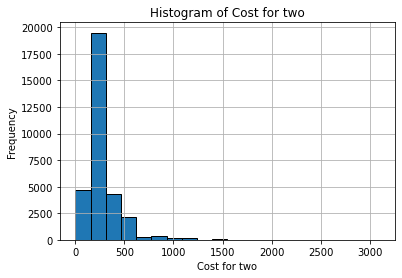

In [13]:
# Histogram to find outliers
plt.hist(restaurant_df['Cost for two'], bins=20, edgecolor='black')
plt.title('Histogram of Cost for two')
plt.xlabel('Cost for two')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Majority of the restaurants have costs for two people below Rs 1000. There are very few restaurants with costs for two people exceeding 1000.

## 2.4 Feature Engineering 

### 2.4.1 Area_Avg_Rating: 
It is the median rating of restaurants within a specific area of the city. It can used to determine which areas have the highest average ratings, indicating regions with generally better dining experiences.

In [14]:
# Aggregate ratings by area to get average area ratings.
restaurant_df['Area_Avg_Rating'] = restaurant_df.groupby('Area')['Rating'].transform('median')

### 2.4.2 Cost_Efficiency:
It is a metric that combines cost and rating to evaluate the value provided by a restaurant. It can be calculated as the ratio of rating to cost. It can help to compare cost efficiency across restaurants to determine competitive positioning.

In [15]:
# Create a cost-efficiency measure.
restaurant_df['Cost_Efficiency'] =restaurant_df['Cost for two'] / restaurant_df['Rating']

### 2.4.3 Normalized_Cost:
It is the cost for two people, normalized across all restaurants to a common scale. It facilitate easier comparison of restaurant costs by putting them on a common scale.

In [16]:
# Normalized 'Cost for two'.
restaurant_df['Normalized_Cost'] = (restaurant_df['Cost for two'] - restaurant_df['Cost for two'].median()) / restaurant_df['Cost for two'].std()

### 2.4.4 Cuisine Preference Score of a city:
Local cuisine preference is determined by analyzing the popularity of different cuisines within a city. Understanding the cuisine preferences of a city is crucial for capturing the market share and maintaing the customer satisfaction.

In [17]:
# Local Cuisine Preference Score

# Count the number of each category in each city
category_counts = restaurant_df.groupby(['city', 'Category']).size().reset_index(name='category_count')
# Calculate total number of restaurants in each city
total_counts = restaurant_df.groupby('city').size().reset_index(name='total_count')
# Merge and calculate preference score
category_counts = category_counts.merge(total_counts, on='city')
category_counts['preference_score'] = (category_counts['category_count'] / category_counts['total_count'])*100

# Merge back with the original DataFrame
restaurant_df = restaurant_df.merge(category_counts[['city', 'Category', 'preference_score']], on=['city', 'Category'], how='left')

### 2.4.5 Competition density:
Competition density is obtained by counting the number of restaurants in the same area and locality. By analysing the competition density, competitive pricing strategies can be adopted by the restaurants. It is also helpful in determining the optimal location for setting up new restaurants.

In [18]:
# Competition Density
# Count the number of restaurants in each locality
competition_density = restaurant_df.groupby(['Area', 'Locality']).size().reset_index(name='competition_density')

# Merge back with the original DataFrame
restaurant_df = restaurant_df.merge(competition_density, on=['Area', 'Locality'], how='left')

### 2.4.5  Average cost per area/locality
It helps to identify which localities are generally more expensive or more affordable. It helps the stakeholders understand market positioning and adjust pricing strategies.

In [19]:
average_cost_per_locality = restaurant_df.groupby('Area')['Cost for two'].mean().reset_index()
average_cost_per_locality.columns = ['Area', 'average_cost']

# Merge the average cost back to the original DataFrame
restaurant_df = restaurant_df.merge(average_cost_per_locality, on='Area', how='left')

In [20]:
restaurant_df.head()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery,Area_Avg_Rating,Cost_Efficiency,Normalized_Cost,preference_score,competition_density,average_cost
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0,3.850,102.564103,0.857494,0.070323,1,286.111111
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0,4.200,93.023256,0.857494,0.562588,1,316.666667
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0,4.000,87.500000,0.571662,0.070323,4,292.857143
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0,4.000,35.714286,-0.571662,0.140647,76,489.658333
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0,4.025,97.560976,0.857494,0.070323,23,287.260870


# 3. EDA

## 3.1 Univariate Analysis

### 3.1.1 Cities with most number of restaurants

In [21]:
City_restaurant_counts = restaurant_df['city'].value_counts()
City_restaurant_counts.head(49)

Ghaziabad         1555
Kolkata           1527
Pune              1492
Delhi             1422
Lucknow           1231
Ahmedabad         1163
Mumbai            1146
Hyderabad         1112
Indore            1088
Nagpur            1031
Chinchvad         1022
Cawnpore           996
Bangalore          917
Thane              874
Ludhiana           837
Chandigarh         786
Surat              763
Patna              761
Varanasi           735
Vadodara           665
Faridabad          637
Raipur             548
Bhopal             541
Nasik              538
Jaipur             503
Ranchi             501
Aurangabad         482
Allahabad          471
Bezwada            466
Agra               462
Amritsar           461
Mysore             394
Rajkot             388
Vishakhapatnam     380
Madurai            376
Bareilly           376
Chennai            374
Jamshedpur         374
Kalyan             366
Gwalior            342
Meerut             308
Jabalpur           283
Haora              270
Aligarh    

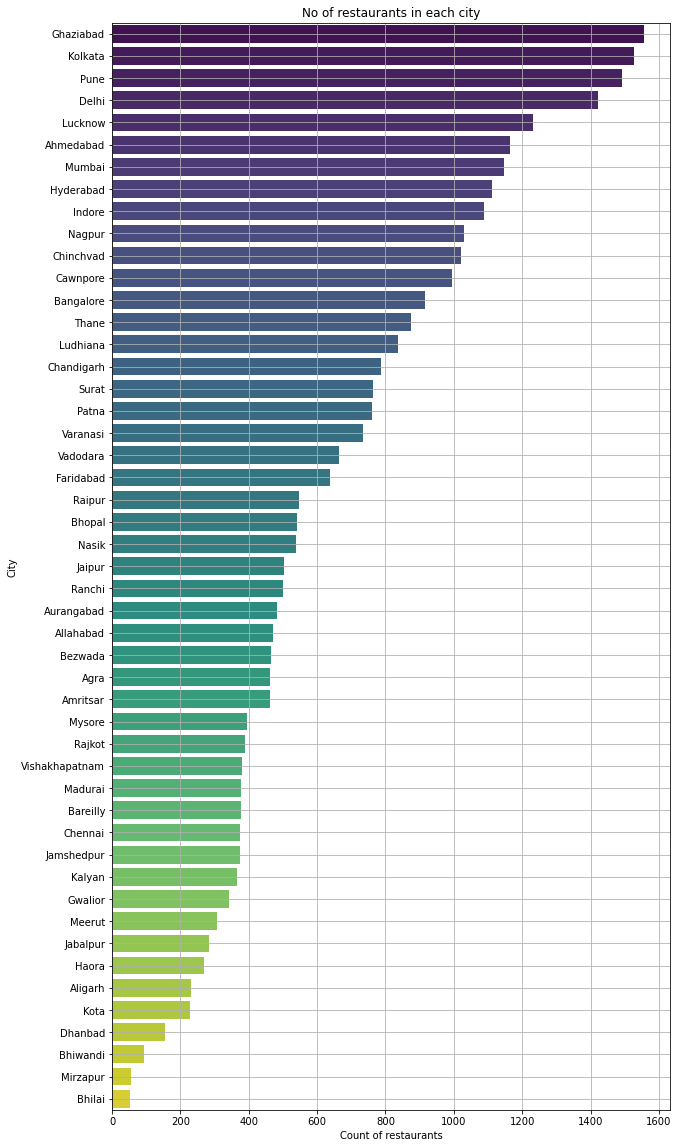

In [22]:
# Visualization 
plt.figure(figsize=(10,20))
sns.barplot(x = City_restaurant_counts.values, y = City_restaurant_counts.index, palette = 'viridis')
plt.title('No of restaurants in each city')
plt.xlabel('Count of restaurants')
plt.ylabel('City')
plt.grid(True)
plt.show()

### 3.1.2 Popular food prepared by various restaurants

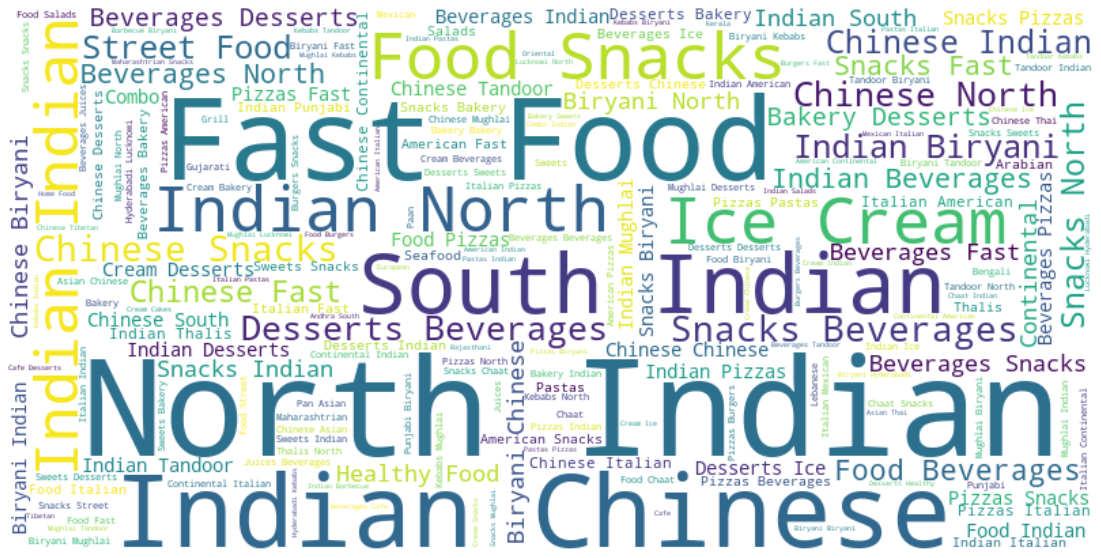

In [23]:
text = ' '.join(restaurant_df['Category'])

# Remove commas and create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(re.sub(r',', ' ', text))

# Plot word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* The categories North Indian, Fast Food, Indian Chinese followed by South Indian and Snacks are the most frequent categories of food offered by the restaurants.

### 3.1.3 What percentage of restaurants serve veg and what percentage of restaurants serve non-veg?

In [24]:
veg_nonveg_ratio = restaurant_df['Veg'].value_counts(normalize='true')*100
veg_nonveg_ratio

False    72.502989
True     27.497011
Name: Veg, dtype: float64

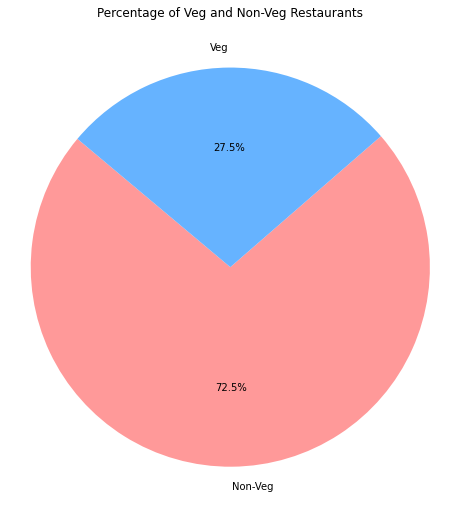

In [25]:
plt.figure(figsize=(8, 9))
labels = ['Non-Veg', 'Veg']
plt.pie(veg_nonveg_ratio, labels=labels,autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Veg and Non-Veg Restaurants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 3.1.4 Percentage of restaurants that provide long distance delivery

In [26]:
Long_dist_delivery = restaurant_df['Long Distance Delivery'].value_counts(normalize='true')*100
Long_dist_delivery


0    64.16074
1    35.83926
Name: Long Distance Delivery, dtype: float64

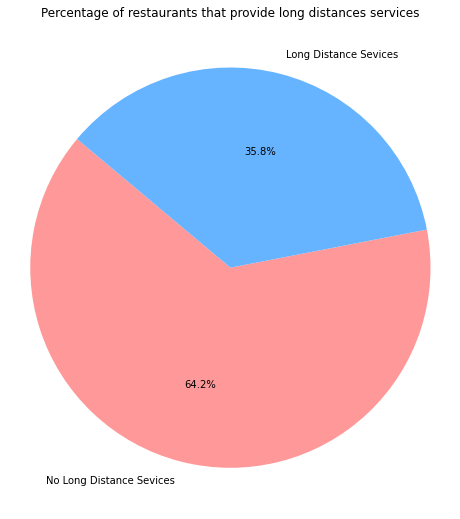

In [27]:
plt.figure(figsize=(8, 9))
labels = ['No Long Distance Sevices', 'Long Distance Sevices']
plt.pie(Long_dist_delivery, labels=labels,autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of restaurants that provide long distances services')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 3.1.5 Frequency Distribution of Rating

In [28]:
# Ratings
restaurant_df['Rating'].describe()

count    29633.000000
mean         3.891570
std          0.386226
min          1.100000
25%          3.700000
50%          3.900000
75%          4.100000
max          5.000000
Name: Rating, dtype: float64

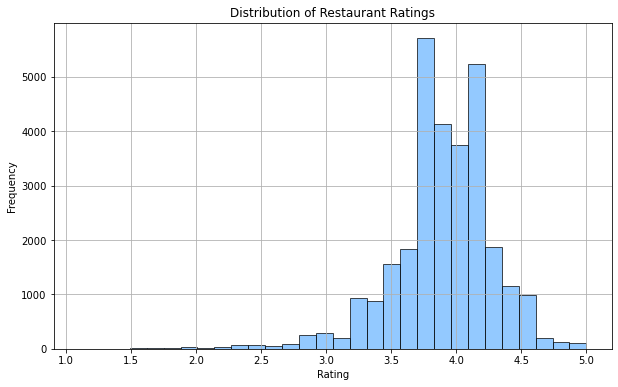

In [29]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(restaurant_df['Rating'], bins=30, edgecolor='black', alpha=0.7, color='#66b3ff')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Most restaurants are rated between 3.5 and 4.1, suggesting that the general quality of restaurants is relatively high.
* The skewed nature of the distribution indicates that extremely low or extremely high ratings are less common.

### 3.1.6 Frequency Distribution of Cost for two

In [30]:
# Cost for two
restaurant_df['Cost for two'].describe()

count    31778.000000
mean       289.836019
std        174.928432
min          0.000000
25%        200.000000
50%        250.000000
75%        300.000000
max       3100.000000
Name: Cost for two, dtype: float64

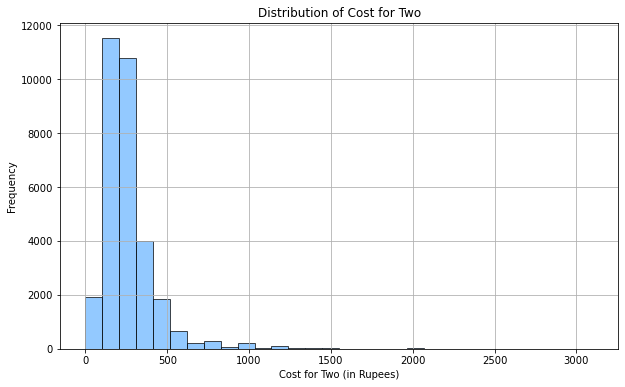

In [31]:
# Distribution of cost
plt.figure(figsize=(10, 6))
plt.hist(restaurant_df['Cost for two'], bins=30, edgecolor='black', alpha=0.7, color='#66b3ff')
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost for Two (in Rupees)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The cost of two servings for most of the restaurants lies between Rs. 200 and 300

### 3.1.7 Cost Efficiency Distribution

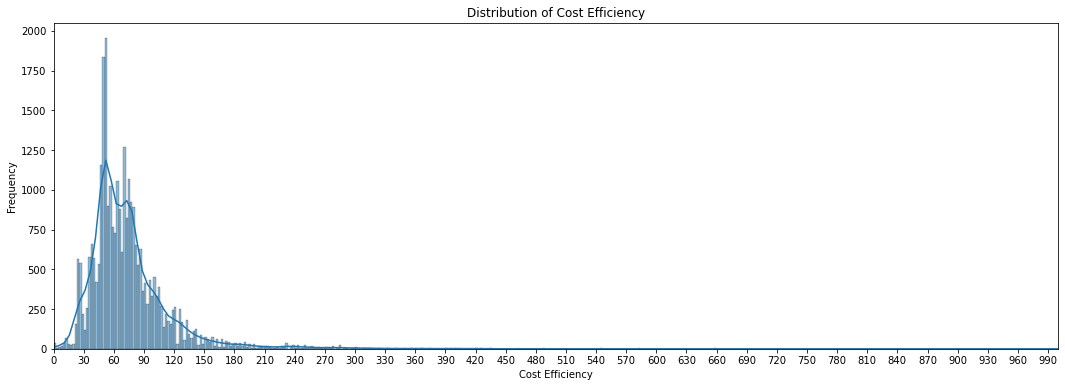

In [32]:
# Visualization of cost efficiency distribution
plt.figure(figsize=(18, 6))
sns.histplot(restaurant_df['Cost_Efficiency'], kde=True)
plt.title('Distribution of Cost Efficiency')
plt.xlabel('Cost Efficiency')
plt.ylabel('Frequency')
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1001, 30))
plt.show()

* The above plot shows that the cost efficiency is higher for cost for two people ranging from 50 to 90

### 3.1.7 Key outcomes of univariate analysis:
* Ghaziabad has the highest count of restaurants with around 1555 restaurants registered in Swiggy followed by Kolakata, Pune and Delhi. Bhilai, Mirzapur and Bhiwandi are the cities with relatively lower number of restaurants with a total of 51, 56 and 92 restaurants respectively. The restaurants in these cities can register in Swiggy platform and improve their online ratings. This can potentially lead to increased orders in the future. 
* From the word cloud, it can be seen that 'Indian', 'North Indian','South Indian', 'Indian Chinese' and 'Fast Food' are some of the most famous cuisines preferred by the consumers. Investing in restaurants with these cuisines can increase customer satisfaction and eventually leading to higher ratings and higher orders.
* Approximately 72% of the customers prefer Non vegetarian food. This implies that market is bigger for vegetarian cuisines. More share of the market can be captured by restaurants offering Non vegetarian food compared to the restaurants offering vegetarian cuisines.
* Approximately 35% of the restaurants offer Long Distance Delivery Service. By expanding this service and strategically selecting distances that maximize profits, restaurants can capture a larger market share.
* From the frequency distribution of ratings it can be seen that half of the restaurants have ratings below 3.9 and half have ratings above 3.9. Also 75% of the restaurants have ratings less than or equal to 4.1. The average rating is close to 4, indicating generally positive customer experiences.
* The average cost for two is around 290, suggesting a moderate pricing level overall. The relatively high standard deviation shows that the cost for two varies significantly across different restaurants.Most restaurants charge between 200 and 300 for two people, as indicated by the 25th and 75th percentiles.
* Restaurants with a cost for two people in the range of 50 to 90 tend to have higher cost efficiency, suggesting that this price range provides better value for money or higher satisfaction.

## 3.2 Bivariate analysis

### 3.2.1 Does cost of food influence rating?

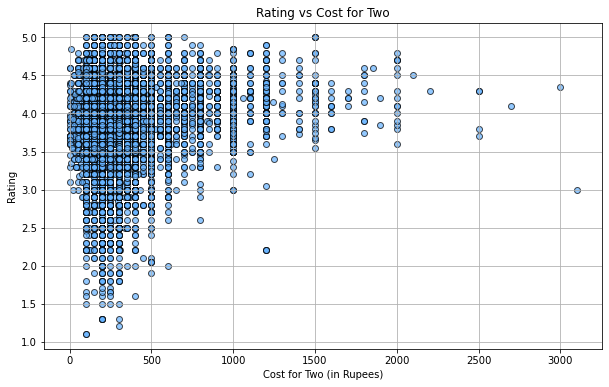

In [33]:


# Scatter plot for Ratings vs Cost for two
plt.figure(figsize=(10, 6))
plt.scatter(restaurant_df['Cost for two'], restaurant_df['Rating'], edgecolor='black', alpha=0.7, color='#66b3ff')
plt.title('Rating vs Cost for Two')
plt.xlabel('Cost for Two (in Rupees)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


The graph looks denser in the left part. This means that for costs within 0 to 500, ratings are distributed from 1 to 5. But as the cost increases above 1000, the ratings are ranging from 3.5 to 5.   

In [34]:
correlation = restaurant_df['Rating'].corr(restaurant_df['Cost for two'], method='spearman')
print("Spearman rank correlation coefficient:", correlation)

Spearman rank correlation coefficient: 0.09215088534324214


Interpretation:
Spearman rank correlation coefficient is positive, but very close to 0. This indicates a very weak positive correlation, meaning there might be a slight tendency for costlier items to have slightly higher ratings, but it's not a statistically significant trend.
The cost might not be a major factor influencing the ratings.

### 3.2.2 How does rating vary in each city?

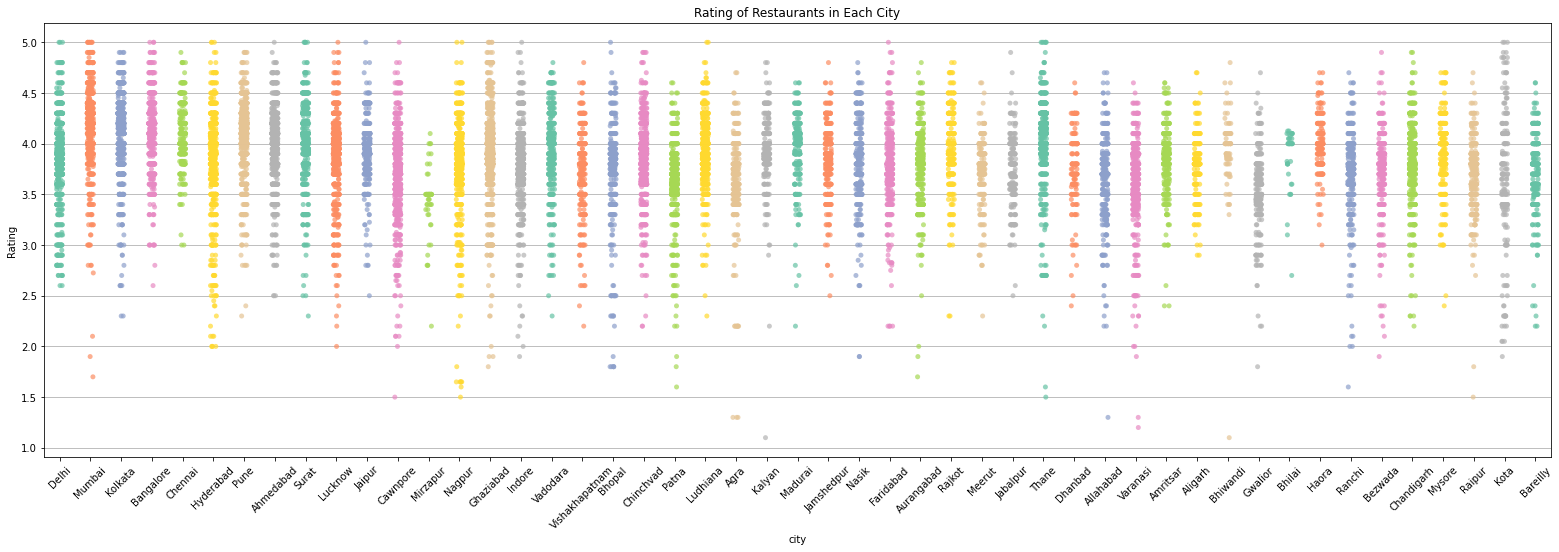

In [35]:
plt.figure(figsize=(27, 8))
sns.stripplot(x=restaurant_df['city'], y=restaurant_df['Rating'], data=restaurant_df, jitter=True, palette='Set2', alpha=0.7)
plt.title('Rating of Restaurants in Each City')
plt.xlabel('city')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

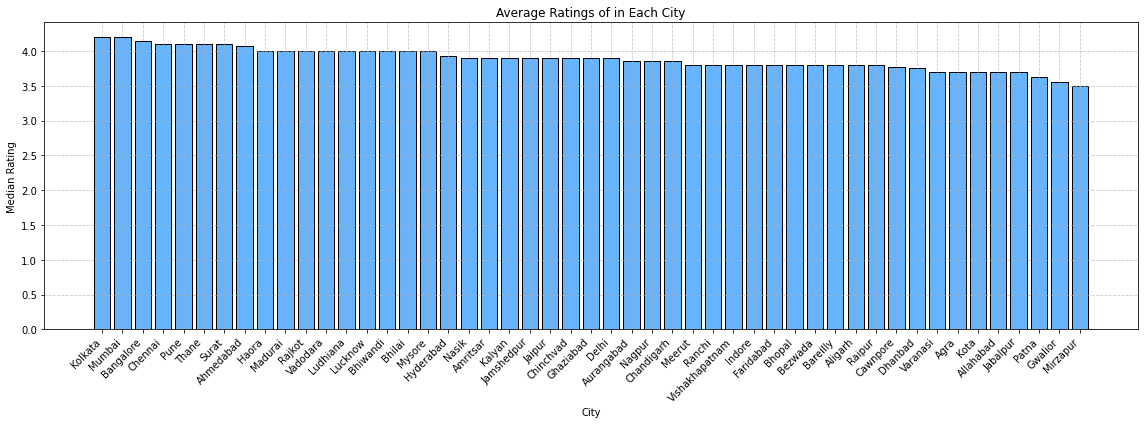

In [36]:
median_ratings = restaurant_df.groupby('city')['Rating'].median().reset_index()

# Sort the DataFrame by the 'Rating' column in descending order
median_ratings = median_ratings.sort_values(by='Rating', ascending=False)

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(median_ratings['city'], median_ratings['Rating'], color='#66b3ff', edgecolor='black')
plt.title('Average Ratings of in Each City')
plt.xlabel('City')
plt.ylabel('Median Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Mirzapur has the lowest median rating. Kolkata has the highest median rating. 
* There is no city that has a median rating below 3.5. Though this is possible since the restaurant data is from the top 50 Indian cities, there could also be a potential bias in data sampling.

### 3.2.3 Restaurants performing better than the area average ratings

In [37]:
above_avg_rating =  restaurant_df[restaurant_df['Rating'] > restaurant_df['Area_Avg_Rating']]
above_avg_rating

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery,Area_Avg_Rating,Cost_Efficiency,Normalized_Cost,preference_score,competition_density,average_cost
0,KFC,"American,Snacks,Biryani",3.900,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0,3.8500,102.564103,0.857494,0.070323,1,286.111111
1,McDonald's,American,4.300,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0,4.2000,93.023256,0.857494,0.562588,1,316.666667
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.200,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0,4.0000,35.714286,-0.571662,0.140647,76,489.658333
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.100,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0,4.0250,97.560976,0.857494,0.070323,23,287.260870
6,Burger King,American,4.200,350,False,Delhi,Connaught Place,New Delhi Railway Station,"Commercial Site,New Delhi Railway Station,DMRC...",0,4.0000,83.333333,0.571662,0.562588,1,489.658333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31747,Hotel Hirapanna,Indian,4.200,350,False,Bareilly,100 Futa Road,Phoenix Mall,"01, NEAR PETROL PUMB, 100 FUTA ROAD, BAREILLY,...",0,3.8000,83.333333,0.571662,4.787234,2,325.000000
31753,Lasani Point,"North Indian,Biryani",3.875,300,False,Bareilly,Agarsen Nagar Opp.Green Park,Phoenix Mall,"9-B,Agarsen Nagar Infront Of Green Park Bareil...",0,3.7250,77.419355,0.285831,0.265957,2,300.000000
31755,Hungry World,Chinese,3.600,250,True,Bareilly,Phoenix Mall,Phoenix Mall,Golden Green Park Near Gurudwara Harunagla Bar...,0,3.5875,69.444444,0.000000,2.925532,21,257.363636
31757,New Aryans Restaurant,North Indian,4.200,100,True,Bareilly,Pilibhit Bypass,Phoenix Mall,Tulsi Nagar Pilibhit Bye Pass Bareilly UP 243001,0,3.7000,23.809524,-0.857494,6.382979,4,275.000000


In [38]:
above_avg_proportion = round((above_avg_rating.shape[0]/restaurant_df.shape[0])*100,2)
print("The proportion of restaurants that perform above the average of restaurants in its area:",above_avg_proportion,"%")

The proportion of restaurants that perform above the average of restaurants in its area: 36.25 %


### 3.2.4 How does average cost of food vary in each city?

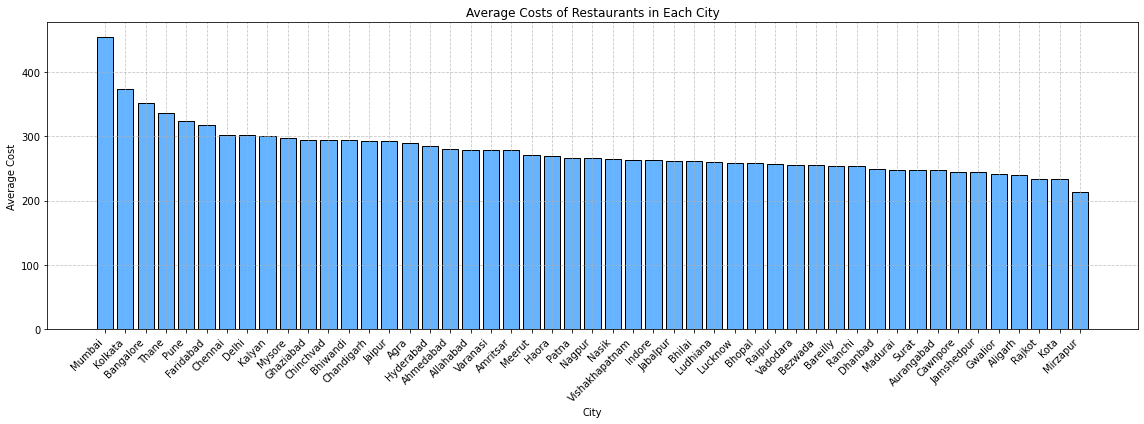

In [39]:
# city vs cost

mean_ratings = restaurant_df.groupby('city')['Cost for two'].mean().reset_index()

# Sort the DataFrame by the 'Rating' column in descending order
mean_ratings = mean_ratings.sort_values(by='Cost for two', ascending=False)

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(mean_ratings['city'], mean_ratings['Cost for two'], color='#66b3ff', edgecolor='black')
plt.title('Average Costs of Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Average Cost')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Mumbai is the most expensive city as the average cost is Rs. 450 followed by Kolkata and Bangalore. 
* The average cost lies between Rs. 200 and 300 for other cities.

### 3.2.5 Do long distance delivery services and Veg affect ratings of the restaurants?

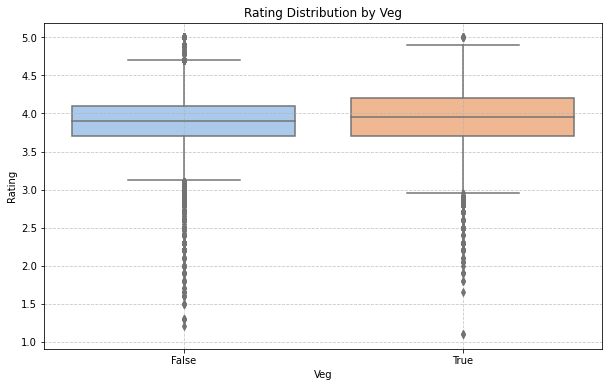

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Veg', y='Rating', data=restaurant_df, palette='pastel')
plt.title('Rating Distribution by Veg')
plt.xlabel('Veg')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

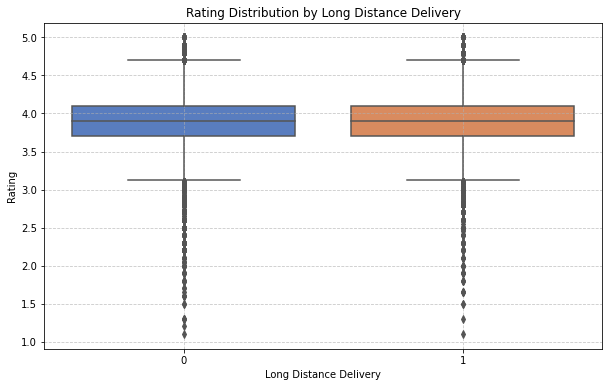

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Long Distance Delivery', y='Rating', data=restaurant_df, palette='muted')
plt.title('Rating Distribution by Long Distance Delivery')
plt.xlabel('Long Distance Delivery')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* The distribution of ratings between restaurants with and without long-distance service appears similar.
* This suggests that this service offering may not significantly influence customer ratings.

### 3.2.6  Area wise ratings and cost analysis for a chosen city of interest

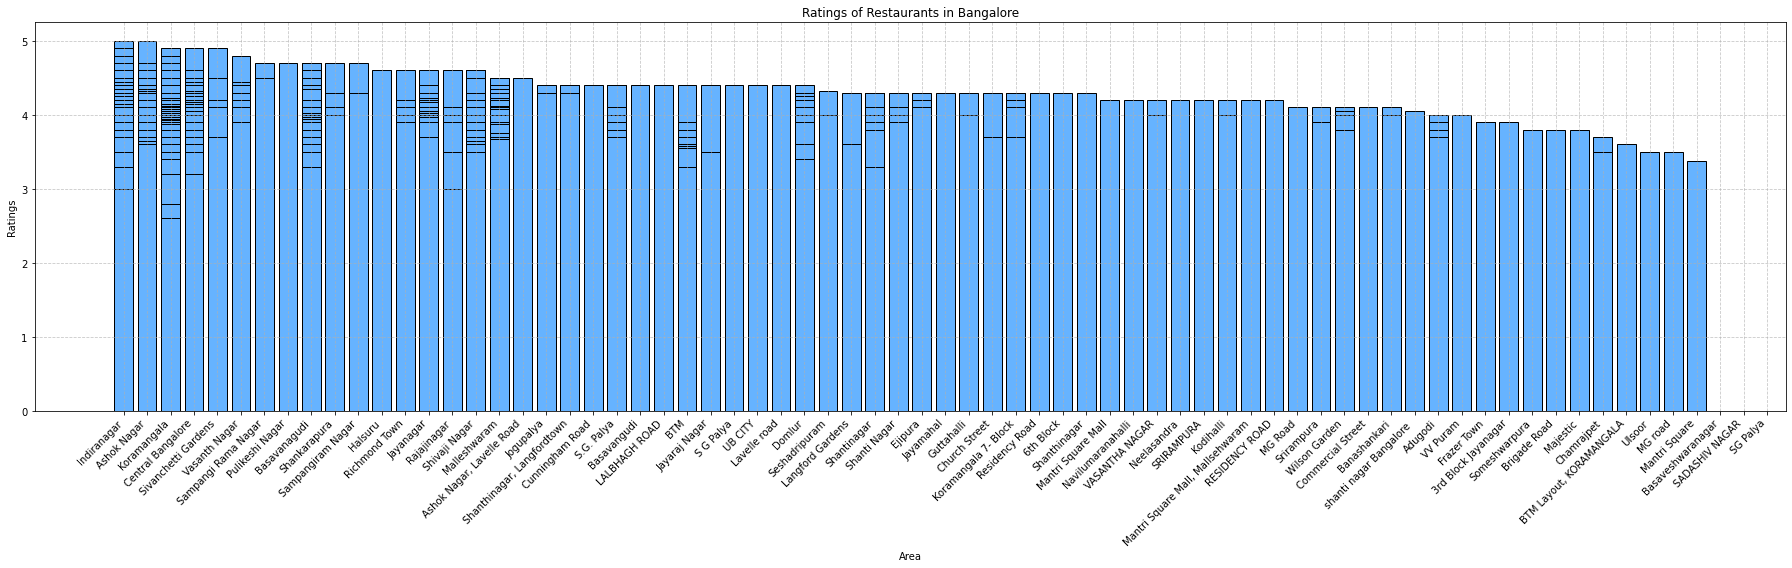

In [42]:
chosen_city = "Bangalore"  # Replace with actual user input
city_df = restaurant_df[restaurant_df['city'] == chosen_city]

# Sort city_df by 'Rating' column in descending order
city_df_sorted = city_df.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(25, 8))
plt.bar(city_df_sorted['Area'], city_df_sorted['Rating'], color='#66b3ff', edgecolor='black')
plt.title(f'Ratings of Restaurants in {chosen_city}')
plt.xlabel('Area')
plt.ylabel('Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

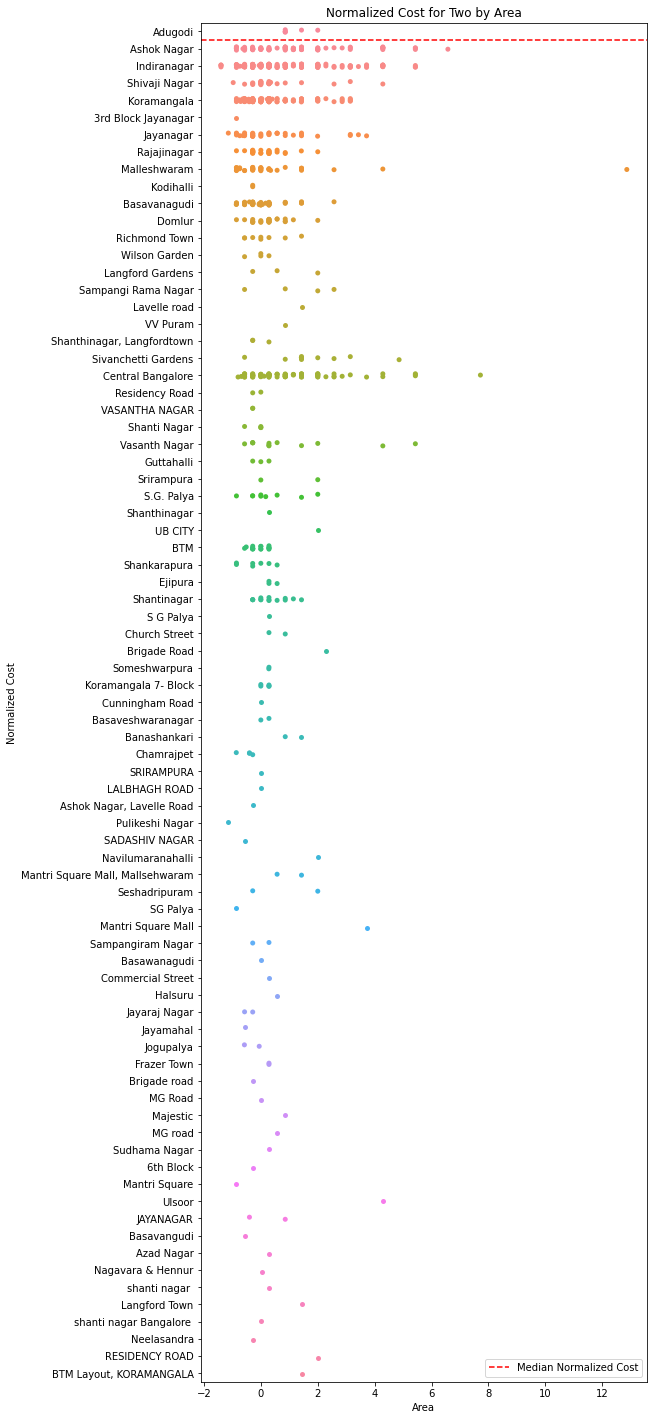

In [43]:
chosen_city = "Bangalore"  # Replace with actual user input
city_df = restaurant_df[restaurant_df['city'] == chosen_city]

plt.figure(figsize=(8,25))
sns.stripplot(y='Area', x='Normalized_Cost', data=city_df, jitter=True, orient='h')
plt.title('Normalized Cost for Two by Area')
plt.xlabel('Area')
plt.ylabel('Normalized Cost')
plt.axhline(y=0.5, color='r', linestyle='--', label='Median Normalized Cost')
plt.legend()
plt.show()

Areas with denser clusters of points may indicate that restaurants in those areas have similar cost efficiency. Areas with a wider spread show more variation in cost efficiency. Some clusters can be seen in the restaurants situated in Koramangala, Basavangudi, BTM.

### 3.2.6 Cuisine Preference scores for the city

<ipython-input-44-f176f09fb8a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Category'] = city_df['Category'].astype(str).str.split(',').apply(lambda x: [item.strip() for item in x])


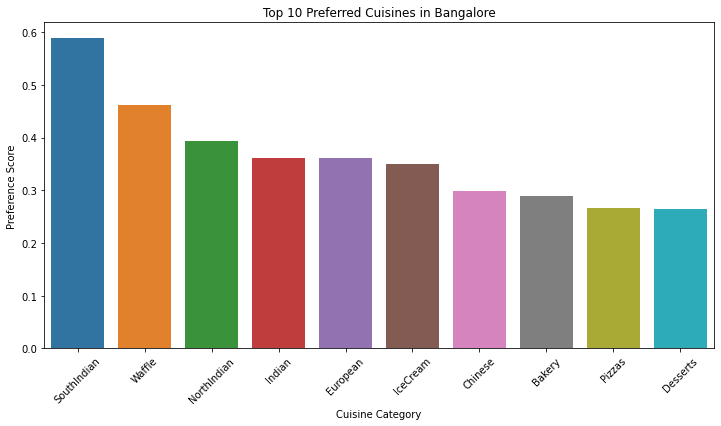

In [44]:
chosen_city = 'Bangalore'  # Replace with your chosen city

# Filter the dataset for the chosen city
city_df = restaurant_df[restaurant_df['city'] == chosen_city]

# Split the 'Category' column into separate strings and remove whitespace
city_df['Category'] = city_df['Category'].astype(str).str.split(',').apply(lambda x: [item.strip() for item in x])

# Explode the 'Category' column to have one category per row
expanded_category_df = city_df.explode('Category')

expanded_category_df['Category'] = expanded_category_df['Category'].apply(lambda x: str(x).replace('[','').replace(']','').replace('\'', '').replace(' ',''))

# Group by 'Category' and calculate the mean preference score
top_cuisines = expanded_category_df.groupby('Category')['preference_score'].mean().reset_index()

# Sort by preference score and keep only the top 10 cuisines
top_cuisines = top_cuisines.sort_values(by='preference_score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cuisines, x='Category', y='preference_score')

# Adding title and labels
plt.title(f'Top 10 Preferred Cuisines in {chosen_city}')
plt.xlabel('Cuisine Category')
plt.ylabel('Preference Score')

# Show the plot
plt.xticks(rotation=45)
plt.show()


Understanding the cuisine preferences of a city will help optimizing the menu card and capture market share. In Bangalore, the top 10 cuisine preferences are plotted.

### 3.2.7 Competition density based on area and localities

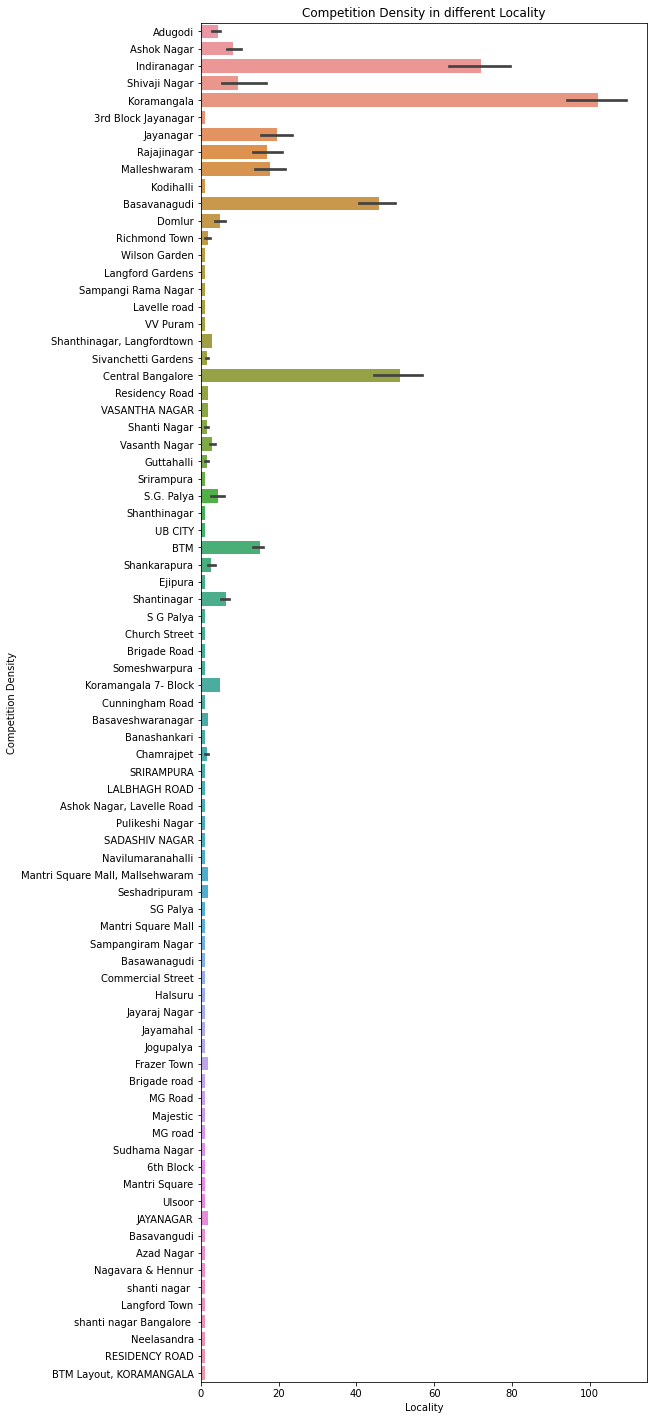

In [45]:
chosen_city = "Bangalore"  # Replace with actual user input
city_df = restaurant_df[restaurant_df['city'] == chosen_city]

# Plotting using seaborn
plt.figure(figsize=(8,25))
sns.barplot(data=city_df, y='Area', x='competition_density', orient = 'h')

# Adding title and labels
plt.title('Competition Density in different Locality')
plt.xlabel('Locality')
plt.ylabel('Competition Density')
plt.show()

Competition density helps in identifying areas with high competition, indicating popular or saturated markets. Low competition density areas are a good opportunities for new restaurants.

### 3.2.8 Average cost of an area or locality

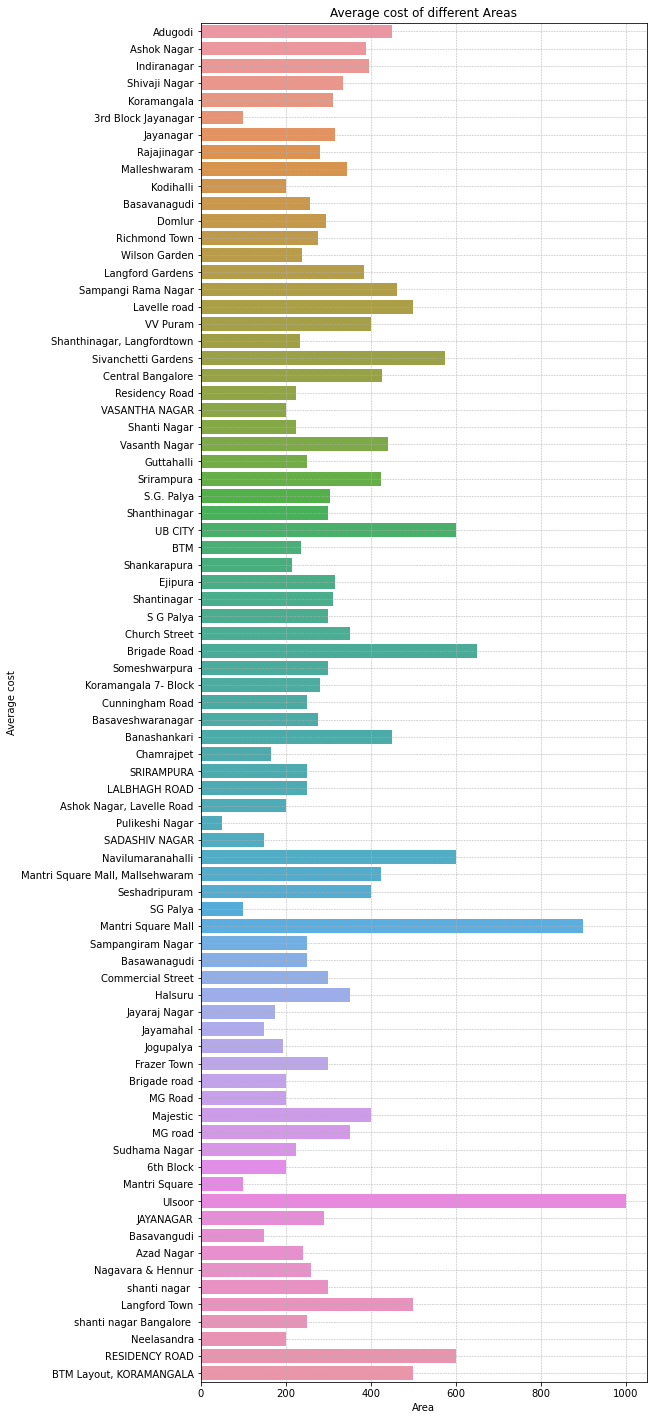

In [48]:
chosen_city = "Bangalore"  # Replace with actual user input
city_df = restaurant_df[restaurant_df['city'] == chosen_city]

# Plotting using seaborn
plt.figure(figsize=(8,25))
sns.barplot(data=city_df, y='Area', x='average_cost', orient = 'h')

# Adding title and labels
plt.title('Average cost of different Areas')
plt.xlabel('Area')
plt.ylabel('Average cost')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Ulsoor has the highest average cost. Areas like Mantri Square, Navilumaranahalli, and Brigade road are other areas with high average pricing. Average cost data can be used for adjusting the pricing of the food and market positioning of the restaurants.

### 3.2.6 Key outcomes of Bivariate analysis

* The strip plot from section 3.2.2 shows the distribution of restaurant ratings across the cities. The points are more or less clustered between 3.5 and 4.5 for all the cities. This suggests a relatively high and consistent level of restaurant quality across the cities. Mumbai and Kolakata have denser clusters around the higher end of the range compared to other cities implying that they might be performing slightly better than the other cities. Cities like Gaziabad, Varanasi, Dhanbad and Allahabad have clusters slightly in the lower end of the range, suggesting that the overall customer satisfaction with restaurants in these cities is slightly lower compared to others.
* The median rartngs of all the cities are lying above 3.5. It shows a positive dining experience across the cities.
* Approximately 36.25% of restaurants are rated higher than the average rating of all restaurants within their respective areas. This indicates that a significant but less than half portion of restaurants excel relative to their local competition.
* The average cost lies between Rs. 200 and 300 for most of the cities.
* Long distance service offering may not significantly influence customer ratings. But then since the restaurants that do not provide long distance service, they may not have the ratings of the long distance customers. So this may not be a valid interpretation.
* The median ratings of various loacalities in Bangalore ranges above 3.5. The ratings of different localities of other cities of interest can also be found.
* In the area wise cost analysis in Bangalore, some clusters are identified in Koramangala, Basavangudi, and BTM indicate areas where restaurant pricing is relatively consistent.
* The cuisine preference score is found to be high for South Indian, North Indian, European and Chinese in Bangalore. Waffles, Desserts and Bakery products also have a high preference among the people.
* From section 3.2.1, it can be seen that Koramangala has the highest competition density, indicating that it one of the most popular dine out places in Bangalore. Indiranagar, Basavangudi and Central Bangalore are the other places in Bangalore that has high competition density. It can also be seen that Jayanagar, Malleshwaram and Rajajinagar have a rising competition density compared to other places and can be a good choice for opening new restaurants
* The average cost of various areas of Bangalore are helpful in determining the market positioning and pricing of the food.


# 4. Summary

* Examined the distribution and popularity of various food categories across different regions of India.
* Analyzed the preferences for vegetarian vs. non-vegetarian cuisine among the restaurants.
* Investigated the impact of long-distance delivery service on restaurant ratings.
* Explored the distribution of restaurant ratings to understand overall customer satisfaction.
* Assessed the influence of dining costs on restaurant ratings.
* Conducted a city-wise analysis of median ratings to identify top and bottom-performing cities.
* Examined cost disparities across cities to understand regional variations in dining expenses.
* Evaluated the impact of long-distance delivery service and food type on restaurant ratings.
* Analyzed area-wise ratings within cities to identify location-specific patterns and opportunities for improvement.

# 5. Conclusion

* **Popular Food Categories:** North Indian, Fast Food, Indian Chinese, South Indian, and Snacks dominate the restaurant scene, reflecting India's diverse culinary preferences.

* **Vegetarian vs. Non-Vegetarian Preference:** Non-vegetarian options are prevalent in 72.5% of restaurants, while 27.5% cater exclusively to vegetarians, suggesting opportunities to optimize menus for broader appeal.

* **Long-Distance Service Impact:** 35.84% of restaurants offer long-distance delivery, yet this service does not significantly influence customer ratings, which are similar across both service offerings.

* **Rating Distribution:** Most restaurants fall within a 3.5 to 4.1 rating range, indicating generally positive customer experiences, with extreme ratings being less common.

* **Cost Influence on Ratings:** Higher costs show a weak positive correlation with ratings, particularly for meals over Rs. 1000, but this is not statistically significant.

* **Cost Efficiency:** Restaurants with a cost for two between Rs. 50 and Rs. 90 typically offer higher value for money, reflecting greater customer satisfaction in this range.

* **City-wise Median Ratings & Costs:** Kolkata has the highest median ratings, while Mumbai is the most expensive city for dining out. Most other cities have average costs between Rs. 200 and Rs. 300.

* **Area-wise Analysis:** Certain areas like Koramangala and BTM in Bangalore show consistent patterns in ratings and cost clusters, highlighting opportunities for strategic location planning. High competition in areas like Indiranagar and Central Bangalore indicates these are popular dining spots, with emerging areas like Jayanagar showing potential for new restaurants.

# 6. Future Works
* Reviews of the customers can be analysed to get insights about their personal experience.
* External data sources (social media trends) can be used to understand causal relationships affecting restaurant performance.
* Predictive models can be developed to forecast restaurant ratings based on factors such as location, cuisine type, cost, and service offerings.
* Potential biases in the dataset(sampling bias, demographic bias) can be evaluated.

# 7. References
* https://www.kaggle.com/learn/data-cleaning
* https://www.geeksforgeeks.org/six-steps-of-data-analysis-process/
* https://bookdown.org/mike/data_analysis/imputation-missing-data.html